In [1]:
pip install fastf1

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as ff1
import fastf1.plotting

In [ ]:
# Set parameters
year = 2025
wknd = 17
session_type = "R"
driver = "PIA"
colormap = mpl.cm.plasma

# === CONFIGURABLE PARAMETERS ===
# year          → Change race season (e.g., 2022, 2023, 2024, 2025)
# wknd          → Race weekend round number (e.g., 1 = Bahrain, 6 = Monaco)
# session_type  → Session type: "R" = Race, "Q" = Qualifying, "FP1"/"FP2"/"FP3" = Practice
# driver        → Choose one driver code from the list below:

# === DRIVER CODES (2025 SEASON) ===
# Red Bull Racing     → "VER" (Max Verstappen), TSU" (Yuki Tsunoda)       -----"PER" (Sergio Pérez)
# Mercedes            → "KIM" Kimmi Antenolli  -------"HAM" (Lewis Hamilton), "RUS" (George Russell)
# Ferrari             → "LEC" (Charles Leclerc), "HAM" (Lewis Hamilton)   ----"SAI" (Carlos Sainz)
# McLaren             → "NOR" (Lando Norris), "PIA" (Oscar Piastri)
# Aston Martin        → "ALO" (Fernando Alonso), "STR" (Lance Stroll)
# Alpine              → "GAS" (Pierre Gasly), "OCO" (Esteban Ocon)
# ~~~~AlphaTauri          → "TSU" (Yuki Tsunoda), "DEV" (Nyck de Vries), "RIC" (Daniel Ricciardo – from mid-season)~~~~
#~~~~~~~~~~~~ Alfa Romeo          → "BOT" (Valtteri Bottas), "ZHO" (Zhou Guanyu)~~~~~~~~~~~~
# Williams            → "ALB" (Alexander Albon), "SAI" (Carlos Sainz)    -----"SAR" (Logan Sargeant)
# Haas F1 Team        → "OCO" (Esteban Ocon)    ------"HUL" (Nico Hülkenberg), "MAG" (Kevin Magnussen)



# === 2025 F1 Calendar (Round → Grand Prix, Location) ===
# 1 → Australian Grand Prix, Melbourne, Australia
# 2 → Chinese Grand Prix, Shanghai, China
# 3 → Japanese Grand Prix, Suzuka, Japan 
# 4 → Bahrain Grand Prix, Sakhir, Bahrain 
# 5 → Saudi Arabian Grand Prix, Jeddah, Saudi Arabia 
# 6 → Miami Grand Prix, Miami, United States 
# 7 → Emilia-Romagna Grand Prix, Imola, Italy 
# 8 → Monaco Grand Prix, Monaco  
# 9 → Spanish Grand Prix, Barcelona (Circuit de Catalunya), Spain 
# 10 → Canadian Grand Prix, Montreal, Canada  
# 11 → Austrian Grand Prix, Spielberg, Austria
# 12 → British Grand Prix, Silverstone, United Kingdom 
# 13 → Belgian Grand Prix, Spa-Francorchamps, Belgium 
# 14 → Hungarian Grand Prix, Mogyoród, Hungary  13 13}
# 15 → Dutch Grand Prix, Zandvoort, Netherlands  14 14}
# 16 → Italian Grand Prix, Monza, Italy  15 15}
# 17 → Azerbaijan Grand Prix, Baku, Azerbaijan  16 16}
# 18 → Singapore Grand Prix, Singapore  17 17}
# 19 → United States Grand Prix, Austin, United States  18 18}
# 20 → Mexico City Grand Prix, Mexico City, Mexico  19 19}
# 21 → São Paulo Grand Prix, São Paulo, Brazil  20 20}
# 22 → Las Vegas Grand Prix, Las Vegas, United States  21 21}
# 23 → Qatar Grand Prix, Lusail, Qatar  22 22}
# 24 → Abu Dhabi Grand Prix, Yas Marina, United Arab Emirates  23 23}

# === 2025 Driver Codes (selected examples) ===
# VER → Max Verstappen  24 24}
# HAM → Lewis Hamilton  25 25}
# LEC → Charles Leclerc  26 26}
# NOR → Lando Norris  27 27}
# PIA → Oscar Piastri  28 28}
# BOT → Valtteri Bottas  29 29}
# ALB → Alexander Albon  30 30}
# OCO → Esteban Ocon  31 31}
# SAI → Carlos Sainz  32 32}
# Note: This is not a full list; you may extend it as needed.


In [ ]:
session = ff1.get_session(year, wknd, session_type)
session.load()
weekend = session.event
# fetch data from Fastf1 on the basis of Parameters given

In [49]:
# Pick fastest lap for the driver
driver_laps = session.laps.pick_drivers(driver)
team_name = driver_laps['Team'].iloc[0]
fastest_lap = driver_laps.pick_fastest()
telemetry = fastest_lap.get_telemetry()

In [51]:
TEAM_COLORS = {
    'Red Bull Racing': '#1E41FF',
    'Mercedes': '#00D2BE',
    'Ferrari': '#DC0000',
    'McLaren': '#FF8700',
    'Aston Martin': '#006F62',
    'Alpine': '#0090FF',
    'AlphaTauri': '#2B4562',
    'AlphaTauri RB': '#2B4562',
    'Alfa Romeo': '#900000',
    'Sauber': '#900000',
    'Williams': '#005AFF',
    'Haas F1 Team': '#FFFFFF'
}

team_color = TEAM_COLORS.get(team_name, '#000000')

In [53]:
# Get telemetry
x = telemetry['X']
y = telemetry['Y']
speed = telemetry['Speed']

# Create line segments for coloring
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


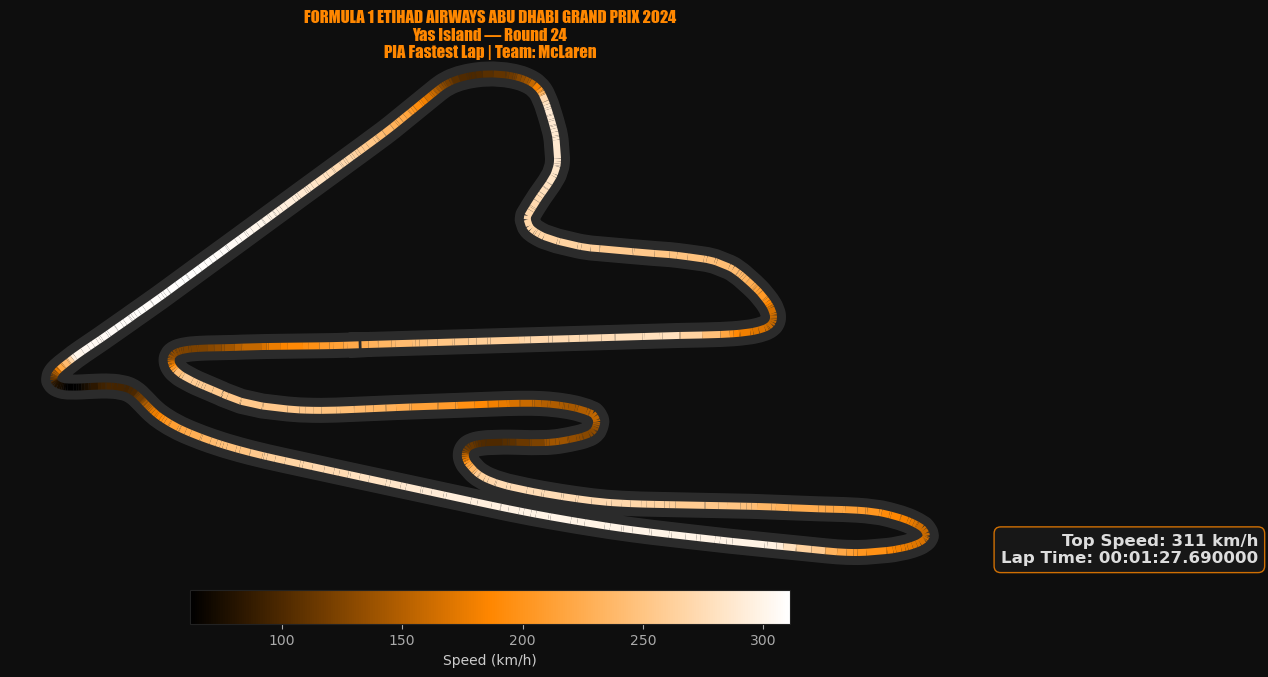

In [55]:
'''
# Create plot
fig, ax = plt.subplots(figsize=(12, 6.75))
fig.suptitle(f"{weekend.name} {year} - {driver} Fastest Lap\nTeam: {team_name}",
             size=22, y=0.97)

# Track background
ax.plot(x, y, color='black', linestyle='-', linewidth=16, zorder=0, alpha=0.3)

# Colored speed map
norm = plt.Normalize(speed.min(), speed.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)
lc.set_array(speed)
ax.add_collection(lc)

# Colorbar
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=speed.min(), vmax=speed.max())
mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                          orientation="horizontal", label="Speed (km/h)")

# Driver label
ax.text(0.02, 0.97, f"Driver: {driver}", transform=ax.transAxes,
        fontsize=14, fontweight='bold', color=team_color, va='top')

# Clean and adjust
ax.axis('off')
plt.subplots_adjust(left=0.08, right=0.92, top=0.9, bottom=0.12)
plt.show()
'''
'''
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(figsize=(12, 6.75))
fig.suptitle(f"{weekend.name} {year} - {driver} Fastest Lap\nTeam: {team_name}", size=22, y=0.97)
ax.plot(x, y, color='black', linestyle='-', linewidth=16, zorder=0, alpha=0.3)

norm = plt.Normalize(speed.min(), speed.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linewidth=5)
lc.set_array(speed)
ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=speed.min(), vmax=speed.max())
mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal", label="Speed (km/h)")

ax.axis('off')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
plt.show()
'''

mpl.rcParams['figure.facecolor'] = '#0e0e0e'
mpl.rcParams['axes.facecolor'] = '#0e0e0e'
mpl.rcParams['axes.edgecolor'] = '#222222'
mpl.rcParams['axes.labelcolor'] = '#e0e0e0'
mpl.rcParams['xtick.color'] = '#888888'
mpl.rcParams['ytick.color'] = '#888888'
mpl.rcParams['text.color'] = '#f5f5f5'


# plot

fig, ax = plt.subplots(figsize=(12, 6.75))
fig.suptitle(
    f"{weekend.OfficialEventName}\n{weekend.Location} — Round {weekend.RoundNumber}\n{driver} Fastest Lap | Team: {team_name}",
    fontdict={
        'family': 'Fantasy',   # Options: 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
        'weight': 'bold',        # 'normal', 'bold', 'light'
        'size': 1004,              # Font size
        'color': team_color      # Title color (same as team theme)
    },
    y=0.96
)


# Track outline
ax.plot(x, y, color='#404040', linestyle='-', linewidth=18, zorder=0, alpha=0.6)

# Speed-based line coloring
team_cmap = mpl.colors.LinearSegmentedColormap.from_list("team_cmap", ["#000000", team_color, "#ffffff"])
norm = plt.Normalize(speed.min(), speed.max())

lc = LineCollection(segments, cmap=team_cmap, norm=norm, linewidth=5)
lc.set_array(speed)
ax.add_collection(lc)

# Colorbar
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=speed.min(), vmax=speed.max())
mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=team_cmap, orientation="horizontal", label="Speed (km/h)")
cbaxes.xaxis.label.set_color('#cccccc')
cbaxes.tick_params(colors='#aaaaaa')

#speed and time
top_speed = int(speed.max())
lap_time = fastest_lap['LapTime']
lap_time_str = str(lap_time).split(" ")[-1]  # format as mm:ss.sss

ax.text(
    1.3, 0.02,
    f"Top Speed: {top_speed} km/h\nLap Time: {lap_time_str}",
    transform=ax.transAxes,
    fontsize=12,
    color='#dddddd',
    ha='right',
    va='bottom',
    fontweight='bold',
    bbox=dict(boxstyle='round,pad=0.4', facecolor='#1a1a1a', edgecolor=team_color, alpha=0.8)
)

ax.axis('off')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
plt.show()